<a href="https://colab.research.google.com/github/RostislavB74/DS_HW5_1/blob/main/dz7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162669 sha256=333b207387c097a7febf2e7b228e9cf42ecbd3aa4b010c5aef8a58bbcc45b213
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [5]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, SVDpp, NMF
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
# Завантажимо датасет Movielens
data = Dataset.load_builtin('ml-100k')

# Ініціалізуємо читача даних
reader = Reader()

# Побудуємо датасет з оцінками
dataset = data.build_full_trainset()

# Створимо список алгоритмів
algorithms = [SVD(), SVDpp(), NMF()]

# Пройдемось по кожному алгоритму та оцінимо їх за допомогою крос-валідації
for algorithm in algorithms:
    print(f"Evaluating {algorithm.__class__.__name__}...")
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=True)
    print(f"Mean RMSE for {algorithm.__class__.__name__}: {results['test_rmse'].mean()}")



Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Evaluating SVD...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9380  0.9394  0.9316  0.9322  0.9380  0.9358  0.0032  
Fit time          1.30    1.54    1.68    1.31    1.31    1.43    0.15    
Test time         0.13    0.20    0.12    0.22    0.12    0.16    0.04    
Mean RMSE for SVD: 0.935841081185244
Evaluating SVDpp...
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9193  0.9269  0.9156  0.9163  0.9195  0.9195  0.0040  
Fit time          26.35   26.44   25.97   26.32   25.92   26.20   0.21    
Test time         4.23    3.94    4.68    4.01    4.98    4.37   

In [8]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, CoClustering, BaselineOnly, NormalPredictor

# Завантажте датасет Movielens
data = Dataset.load_builtin('ml-100k')

# Ініціалізуємо читача даних
reader = Reader()

# Побудуйте датасет з оцінками
dataset = data.build_full_trainset()

# Створіть список алгоритмів
algorithms = [
    SVD(),
    SVDpp(cache_ratings=False),
    SVDpp(cache_ratings=True),
    NMF(),
    SlopeOne(),
    KNNBasic(),
    KNNWithMeans(),
    KNNWithZScore(),
    KNNBaseline(),
    CoClustering(),
    BaselineOnly(),
    NormalPredictor()
]

# Створіть словник для збереження результатів
results = {}

# Проходження по кожному алгоритму та вимірювання його ефективності
for algo in algorithms:
    print(f"Evaluating {algo.__class__.__name__}...")
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
    mean_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])
    mean_time = sum(cv_results['fit_time']) / len(cv_results['fit_time'])
    results[algo.__class__.__name__] = {'RMSE': mean_rmse, 'MAE': mean_mae, 'Time': mean_time}

# Виведіть результати
for algo, metrics in results.items():
    print(f"{algo}: RMSE={metrics['RMSE']}, MAE={metrics['MAE']}, Time={metrics['Time']}")


Evaluating SVD...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9303  0.9433  0.9446  0.9343  0.9280  0.9361  0.0067  
MAE (testset)     0.7344  0.7443  0.7445  0.7368  0.7306  0.7381  0.0055  
Fit time          1.36    1.50    1.42    1.85    1.37    1.50    0.18    
Test time         0.37    0.14    0.21    0.25    0.17    0.23    0.08    
Evaluating SVDpp...
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9166  0.9114  0.9196  0.9264  0.9190  0.9186  0.0049  
MAE (testset)     0.7203  0.7152  0.7228  0.7240  0.7235  0.7212  0.0033  
Fit time          27.89   27.19   25.93   26.28   26.40   26.74   0.71    
Test time         4.20    4.01    4.80    4.18    4.85    4.41    0.35    
Evaluating SVDpp...
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  

In [10]:
"""This module runs a 5-Fold CV for all the algorithms (default parameters) on
the movielens datasets, and reports average RMSE, MAE, and total computation
time.  It is used for making tables in the README.md file"""

# flake8: noqa

import datetime
import random
import time

import numpy as np

from surprise import (
    BaselineOnly,
    CoClustering,
    Dataset,
    KNNBaseline,
    KNNBasic,
    KNNWithMeans,
    NMF,
    NormalPredictor,
    SlopeOne,
    SVD,
    SVDpp,
)
from surprise.model_selection import cross_validate, KFold
from tabulate import tabulate

# The algorithms to cross-validate
algos = (
    SVD(random_state=0),
    SVDpp(random_state=0, cache_ratings=False),
    SVDpp(random_state=0, cache_ratings=True),
    NMF(random_state=0),
    SlopeOne(),
    KNNBasic(),
    KNNWithMeans(),
    KNNBaseline(),
    CoClustering(random_state=0),
    BaselineOnly(),
    NormalPredictor(),
)

# ugly dict to map algo names and datasets to their markdown links in the table
stable = "https://surprise.readthedocs.io/en/stable/"
LINK = {
    "SVD": "[{}]({})".format(
        "SVD",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD",
    ),
    "SVDpp": "[{}]({})".format(
        "SVD++",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp",
    ),
    "NMF": "[{}]({})".format(
        "NMF",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.NMF",
    ),
    "SlopeOne": "[{}]({})".format(
        "Slope One",
        stable + "slope_one.html#surprise.prediction_algorithms.slope_one.SlopeOne",
    ),
    "KNNBasic": "[{}]({})".format(
        "k-NN",
        stable + "knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic",
    ),
    "KNNWithMeans": "[{}]({})".format(
        "Centered k-NN",
        stable + "knn_inspired.html#surprise.prediction_algorithms.knns.KNNWithMeans",
    ),
    "KNNBaseline": "[{}]({})".format(
        "k-NN Baseline",
        stable + "knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline",
    ),
    "CoClustering": "[{}]({})".format(
        "Co-Clustering",
        stable
        + "co_clustering.html#surprise.prediction_algorithms.co_clustering.CoClustering",
    ),
    "BaselineOnly": "[{}]({})".format(
        "Baseline",
        stable
        + "basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly",
    ),
    "NormalPredictor": "[{}]({})".format(
        "Random",
        stable
        + "basic_algorithms.html#surprise.prediction_algorithms.random_pred.NormalPredictor",
    ),
    "ml-100k": "[{}]({})".format(
        "Movielens 100k", "https://grouplens.org/datasets/movielens/100k"
    ),
    "ml-1m": "[{}]({})".format(
        "Movielens 1M", "https://grouplens.org/datasets/movielens/1m"
    ),
}


# set RNG
np.random.seed(0)
random.seed(0)

# dataset = "ml-100k"
# data = Dataset.load_builtin(dataset)
kf = KFold(random_state=0)  # folds will be the same for all algorithms.

table = []
for algo in algos:
    start = time.time()
    out = cross_validate(algo, data, ["rmse", "mae"], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[algo.__class__.__name__]
    mean_rmse = "{:.3f}".format(np.mean(out["test_rmse"]))
    mean_mae = "{:.3f}".format(np.mean(out["test_mae"]))

    new_line = [link, mean_rmse, mean_mae, cv_time]
    print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = ["Algorithm", "RMSE", "MAE", "Time"]
print(tabulate(table, header, tablefmt="pipe"))

|:-----------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [SVD](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) | 0.934 | 0.737 | 0:00:11 |
|:---------------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [SVD++](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp) | 0.919 | 0.721 | 0:02:40 |
|:---------------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [SVD++](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp) | 0.919 | 0.721 | 0:02:13 |
|:----------------

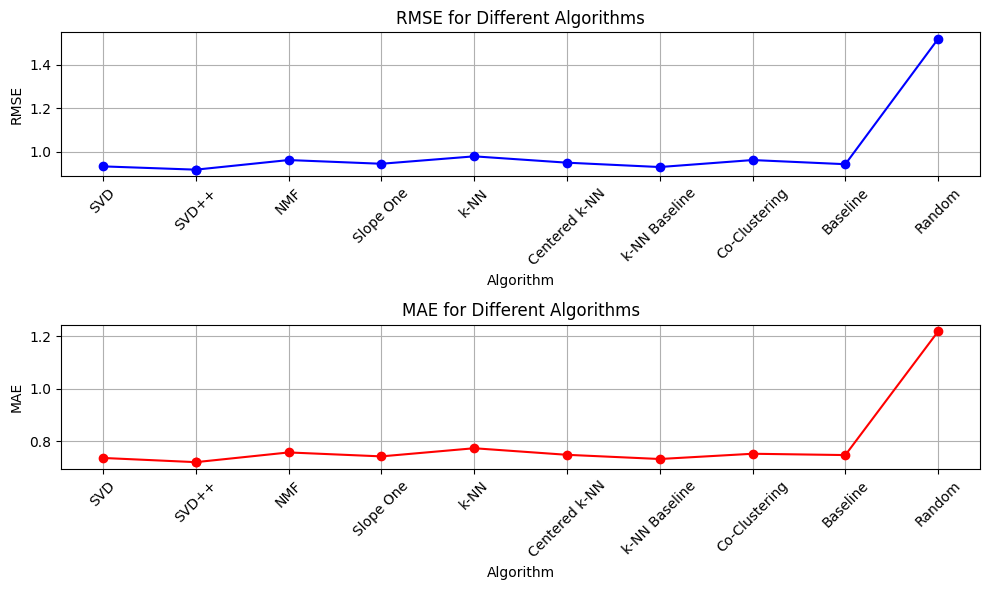

In [11]:
import matplotlib.pyplot as plt

# Дані для графіка
algorithms = ["SVD", "SVD++", "SVD++", "NMF", "Slope One", "k-NN", "Centered k-NN", "k-NN Baseline", "Co-Clustering", "Baseline", "Random"]
rmse = [0.934, 0.919, 0.919, 0.963, 0.946, 0.98, 0.951, 0.931, 0.963, 0.944, 1.518]
mae = [0.737, 0.721, 0.721, 0.758, 0.743, 0.774, 0.749, 0.733, 0.753, 0.748, 1.219]
time = [11, 160, 133, 14, 19, 21, 22, 25, 13, 4, 2]

# Побудова графіків
plt.figure(figsize=(10, 6))

# Графік RMSE
plt.subplot(2, 1, 1)
plt.plot(algorithms, rmse, marker='o', color='b')
plt.title('RMSE for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)

# Графік MAE
plt.subplot(2, 1, 2)
plt.plot(algorithms, mae, marker='o', color='r')
plt.title('MAE for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()
